Arewa Data Science Academy

Deep Learning Cohort1.0

Name: Abdullahi Ahmad

Email: abdulll8392@gmail.com

Title: Week 2 Solution

Exercises Solution

In [19]:
#importing Required Dependencies
import torch
import matplotlib.pyplot as plt #data visualization
from torch import nn

In [2]:
# Setup device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device) #it will print cuda because am running the notebook on collab T4 GPU

cuda


1. Create a straight line dataset using the linear regression formula (weight * X + bias).

Set weight=0.3 and bias=0.9 there should be at least 100 datapoints total.
Split the data into 80% training, 20% testing.
Plot the training and testing data so it becomes visual.

In [3]:
#parameters
weig = 0.3
b = 0.9

In [9]:
# Make X and y using linear regression feature
x = torch.arange(0,1,0.01).unsqueeze(dim = 1) # x will be in the range of 0,1,0.01 because we need 100 datapoint
y = weig * x + b

In [10]:
print(f"Number of X samples: {len(x)}")
print(f"Number of y samples: {len(y)}")
print(f"First 10 X & y samples:\nX: {x[:10]}\ny: {y[:10]}")

Number of X samples: 100
Number of y samples: 100
First 10 X & y samples:
X: tensor([[0.0000],
        [0.0100],
        [0.0200],
        [0.0300],
        [0.0400],
        [0.0500],
        [0.0600],
        [0.0700],
        [0.0800],
        [0.0900]])
y: tensor([[0.9000],
        [0.9030],
        [0.9060],
        [0.9090],
        [0.9120],
        [0.9150],
        [0.9180],
        [0.9210],
        [0.9240],
        [0.9270]])


In [11]:
# Split the data into training and testing
train = int(len(x) * 0.8)
#training data and labels
X_train = x[:train]
y_train = y[:train]
#test data and labels
X_test = x[train:]
y_test = y[train:]

Ploting the prediction

In [21]:
# Plot the training and testing data
def plot(train_data = X_train,train_labels = y_train,test_data = X_test,test_labels = y_test,predictions = None):
  plt.figure(figsize = (10,7))
  plt.scatter(train_data,train_labels,c = 'r',s = 4,label = "Training data")
  plt.scatter(test_data,test_labels,c = 'g',s = 4,label = "Test data")



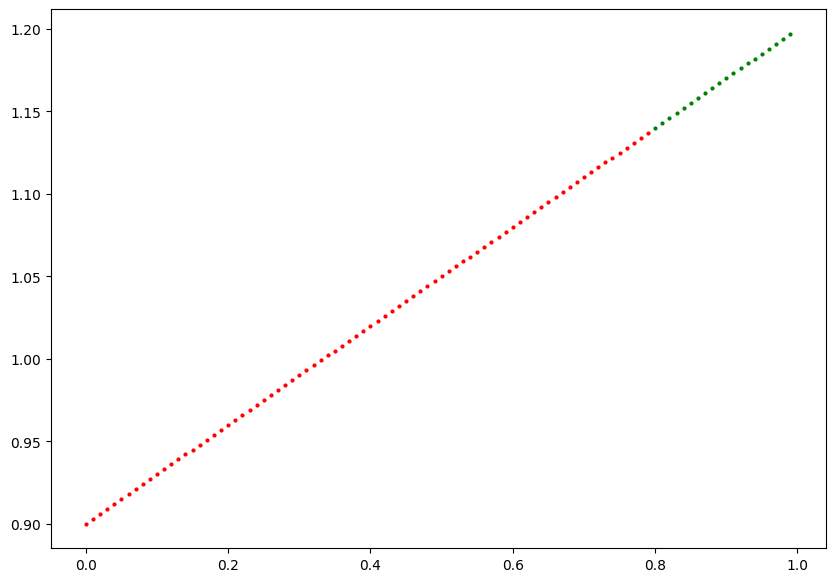

In [22]:
plot() #calling the fuction to display the result

2. Build a PyTorch model by subclassing nn.Module.

1-Inside should be a randomly initialized nn.Parameter() with requires_grad=True, one for weights and one for bias.

2-Implement the forward() method to compute the linear regression function you used to create the dataset in 1.

3-Once you've constructed the model, make an instance of it and check its state_dict().

Note: If you'd like to use nn.Linear() instead of nn.Parameter() you can.

In [23]:
# Creating PyTorch linear regression model by using subclassing nn.Module
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__() #using super to inherit from the torch class
    self.weight = nn.Parameter(data=torch.randn(1,
                                              requires_grad=True,
                                              dtype=torch.float
                                              ))

    self.bias = nn.Parameter(data=torch.randn(1,
                                              requires_grad=True,
                                              dtype=torch.float
                                              ))
#mplement the forward() method to compute the linear regression function you used to create the dataset
  def forward(self, x):
    return self.weight * x + self.bias #computing the linear regression using weight,x,bias as features

In [26]:
torch.manual_seed(50)
model = LinearRegressionModel() #initializing the linear regression class
print(model)
print(model.state_dict())

LinearRegressionModel()
OrderedDict([('weight', tensor([0.4625])), ('bias', tensor([-0.1692]))])


In [28]:
# Instantiate the model and put it to the target device
model.to(device) #am using colab GPU so my target device is cuda
list(model.parameters())

[Parameter containing:
 tensor([0.4625], device='cuda:0', requires_grad=True),
 Parameter containing:
 tensor([-0.1692], device='cuda:0', requires_grad=True)]

3. Create a loss function and optimizer using nn.L1Loss() and torch.optim.SGD(params, lr) respectively.


1-Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the model parameters from the model you created in 2.

2-Write a training loop to perform the appropriate training steps for 300 epochs.

3-The training loop should test the model on the test dataset every 20 epochs.

In [37]:
# Create the loss function and optimizer
loss = nn.L1Loss()
optimizer = torch.optim.SGD(params = model.parameters(),lr = 0.01) #making the learning rate very small to avoid vernishing gradient problem

In [38]:
# Train model for 300 epochs
torch.manual_seed(50)

epochs = 300

# Send data to target device
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  ### Training

  # Put model in train mode
  model.train() #Model training

  # 1. Forward pass
  y_pred = model(X_train) # forward propagation

  # 2. Calculate loss
  los = loss(y_pred,y_train) #Difference between real and predicted value

  # 3. Zero gradients
  optimizer.zero_grad()

  # 4. Backpropagation
  los.backward()

  # 5. Step the optimizer
  optimizer.step()

  ### Performing test after every 20 epoch as requires
  if epoch % 20 == 0:
    # Put model in evaluation mode and setup inference context
    model.eval()
    with torch.inference_mode():
      # 1. Forward pass
      y_preds = model(X_test)
      # 2. Calculate test loss
      test_loss = loss(y_preds,y_test)
      # Print out what's happening
      print(f"Epoch: {epoch} | Train loss: {los:.3f} | Test loss: {test_loss:.3f}")

Epoch: 0 | Train loss: 0.982 | Test loss: 0.883
Epoch: 20 | Train loss: 0.751 | Test loss: 0.612
Epoch: 40 | Train loss: 0.520 | Test loss: 0.342
Epoch: 60 | Train loss: 0.288 | Test loss: 0.071
Epoch: 80 | Train loss: 0.116 | Test loss: 0.145
Epoch: 100 | Train loss: 0.094 | Test loss: 0.195
Epoch: 120 | Train loss: 0.086 | Test loss: 0.195
Epoch: 140 | Train loss: 0.079 | Test loss: 0.183
Epoch: 160 | Train loss: 0.073 | Test loss: 0.168
Epoch: 180 | Train loss: 0.066 | Test loss: 0.152
Epoch: 200 | Train loss: 0.059 | Test loss: 0.137
Epoch: 220 | Train loss: 0.052 | Test loss: 0.122
Epoch: 240 | Train loss: 0.045 | Test loss: 0.106
Epoch: 260 | Train loss: 0.038 | Test loss: 0.090
Epoch: 280 | Train loss: 0.031 | Test loss: 0.073


4. Make predictions with the trained model on the test data.

1-Visualize these predictions against the original training and testing data (note: you may need to make sure the predictions are not on the GPU if you want to use non-CUDA-enabled libraries such as matplotlib to plot).

In [46]:
#from the instruction the prediction would not be on GPU
#Question
# Make predictions with the model
model.eval()

with torch.inference_mode():
  y_preds = model(X_test)
y_preds


tensor([[1.1865],
        [1.1907],
        [1.1950],
        [1.1992],
        [1.2034],
        [1.2076],
        [1.2119],
        [1.2161],
        [1.2203],
        [1.2245],
        [1.2288],
        [1.2330],
        [1.2372],
        [1.2414],
        [1.2456],
        [1.2499],
        [1.2541],
        [1.2583],
        [1.2625],
        [1.2668]], device='cuda:0')

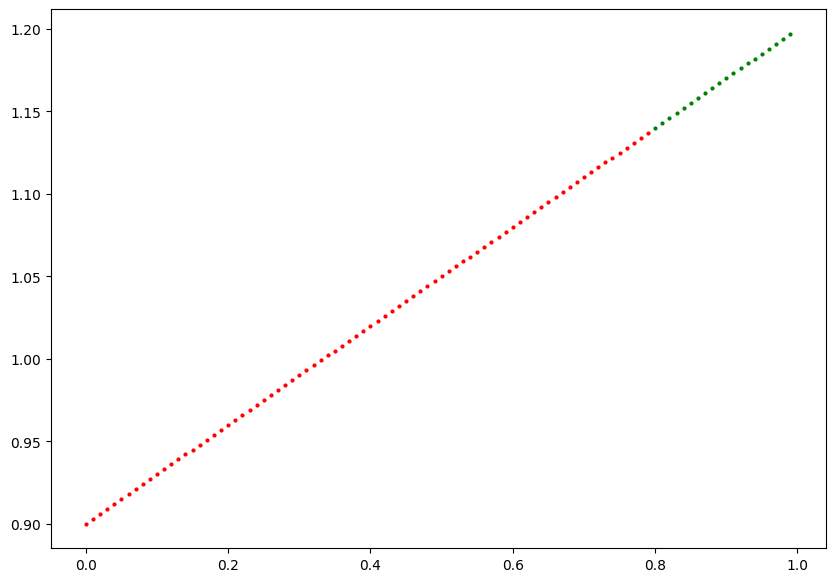

In [47]:
# Plot the predictions (these may need to be on a specific device)
plot(predictions = y_preds.cpu()) #without disconnecting my GPU

5. Save your trained model's state_dict() to file.

1-Create a new instance of your model class you made in 2. and load in the state_dict() you just saved to it.

2- Perform predictions on your test data with the loaded model and confirm they match the original model predictions from 4.

In [48]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True,exist_ok = True)
# 2. Create model save path
MODEL_NAME = "model_1"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
# 3. Save the model state dict
torch.save(obj = model.state_dict(),f = MODEL_SAVE_PATH)


In [49]:
# Create new instance of model and load saved state dict (make sure to put it on the target device)
model_2 = LinearRegressionModel()
model_2.load_state_dict(torch.load(f = MODEL_SAVE_PATH))
model_2.to(device)

LinearRegressionModel()

In [51]:
# Make predictions with loaded model and compare them to the previous
y_preds_new = model_2(X_test) #making predicton with the second mode
y_preds == y_preds_new #comparing the two predicted value it will return bollean value

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')